In [44]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
from IPython.display import Audio
import csv
from scipy.signal import butter, lfilter

In [45]:
data = []
with open("data/8kHz_sampling/unknown_fs=8kHz_1.csv", 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        data.append(float(row['y']))  # Convert to int if y is numeric

    file.close()

In [46]:
data

[1.80004,
 6.3802,
 5.31602,
 5.19241,
 -0.05858,
 12.5808,
 4.54639,
 3.61135,
 2.23162,
 5.7354,
 6.1382,
 -0.145,
 3.33419,
 5.9614,
 5.8939,
 5.86624,
 2.76402,
 10.6119,
 1.51443,
 -0.2958,
 2.31502,
 11.7139,
 3.36508,
 1.49869,
 -0.11631,
 3.48776,
 1.70544,
 3.33996,
 9.64335,
 7.79641,
 5.62273,
 1.79945,
 5.60421,
 3.29643,
 2.26744,
 6.22898,
 0.16685,
 -0.69219,
 10.8408,
 16.06827,
 3.01688,
 3.25499,
 2.57941,
 9.97991,
 6.50038,
 0.88789,
 1.17441,
 0.24605,
 5.31324,
 3.50034,
 -0.16399,
 4.03534,
 2.25232,
 4.74673,
 7.74455,
 4.63473,
 2.45812,
 6.32146,
 11.68624,
 2.17346,
 0.65625,
 0.28351,
 1.76997,
 6.40525,
 10.56153,
 7.10438,
 5.77225,
 1.55216,
 5.86616,
 -0.60436,
 4.14074,
 6.73723,
 3.31116,
 0.85629,
 3.13733,
 9.32257,
 8.18912,
 13.7004,
 0.70022,
 2.22383,
 1.32192,
 6.39988,
 9.65839,
 4.97599,
 2.08333,
 0.44388,
 4.9072,
 5.89587,
 10.25227,
 2.3095,
 2.42801,
 3.52908,
 1.8827,
 6.54828,
 8.96874,
 6.28335,
 0.10073,
 2.28445,
 1.8946,
 3.99477,
 

In [47]:
len(data)

8000

In [48]:
data = np.array(data, dtype=np.float32)

In [49]:
len(data)

8000

In [50]:
Audio(data, rate=8000, autoplay=True)

In [51]:
resampled = librosa.resample(data, orig_sr=8e3, target_sr=40e3)

In [52]:
Audio(resampled[int(3e3):int(19e3)], rate=40000)

In [53]:
selected = resampled[int(6e3):int(22e3)]

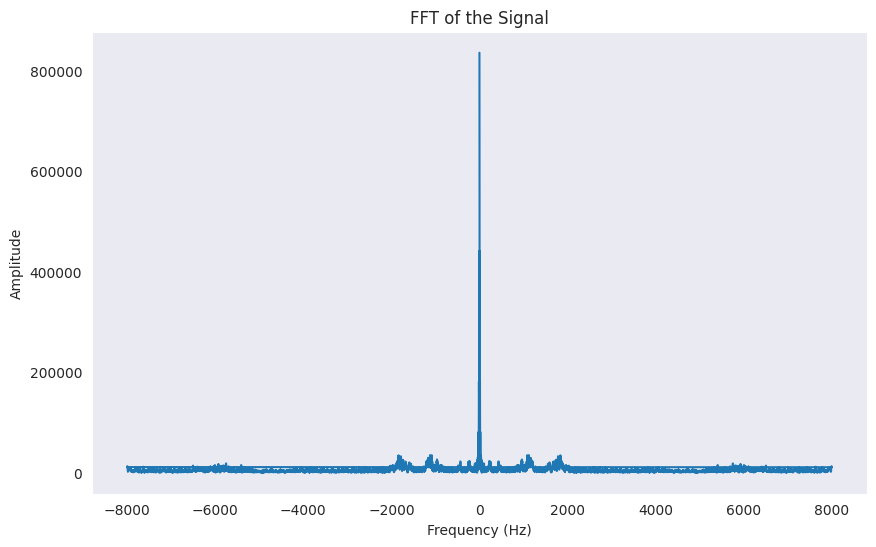

In [54]:
fft_result = np.fft.fft(abs(data))
fft_freqs = np.fft.fftfreq(len(data), d=1/16000)  # Frequency bins

# Plot the FFT
plt.figure(figsize=(10, 6))
plt.plot(fft_freqs[:16000 // 2], np.abs(fft_result)[:16000 // 2])  # One-sided spectrum
plt.title('FFT of the Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

In [55]:
selected /= np.max(selected)

# Filter raw data with bufferworth filter

In [56]:
fs = 16e3
cutoff = 4e3
nyquist = 0.5 * fs 
normal_cutoff = cutoff / nyquist
b, a = butter(3, normal_cutoff, btype='lowpass', analog=False)

y = lfilter(b, a, data)
y = [0 if item is None else item for item in y]
y = np.array(y, dtype=np.float32)

In [57]:
contains_none = any(item is None for item in y)

print(contains_none)

False


# Highpass filter

In [58]:
fs = 16e3
cutoff = 200
nyquist = 0.5 * fs 
normal_cutoff = cutoff / nyquist
b, a = butter(6, normal_cutoff, btype='highpass', analog=False)

y_highpass = lfilter(b, a, y)
y_highpass = [0 if item is None else item for item in y_highpass]
y_highpass= np.array(y_highpass, dtype=np.float32)

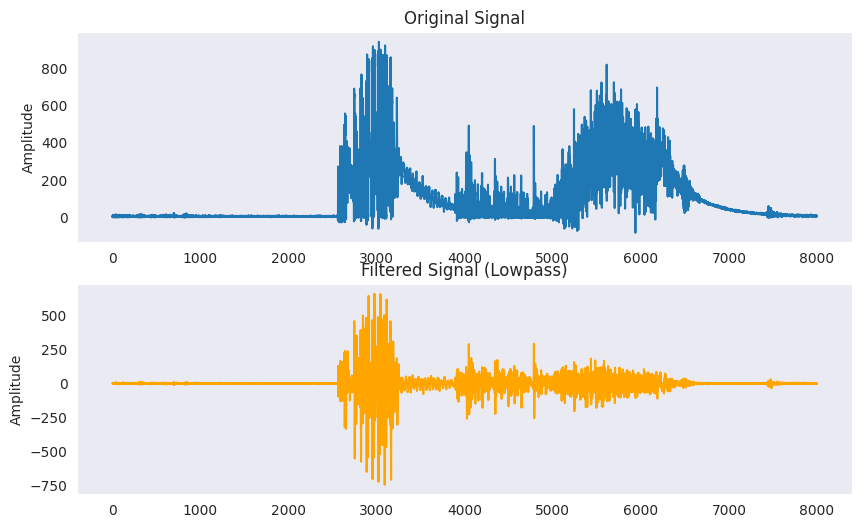

In [59]:
# Plot the original and filtered signals
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(data, label='Original Signal')
plt.title('Original Signal')
plt.ylabel('Amplitude')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(y_highpass, label='Filtered Signal', color='orange')
plt.title('Filtered Signal (Lowpass)')
plt.ylabel('Amplitude')
plt.grid()

In [60]:
Audio(y_highpass, rate=8e3)

D shape: (129, 63)


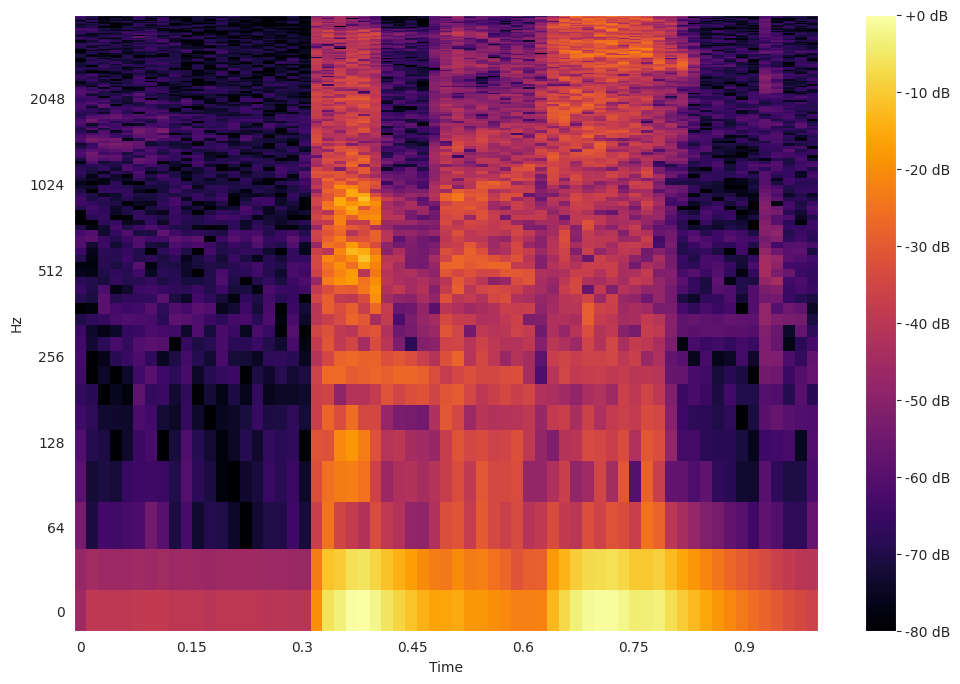

In [61]:
D = librosa.stft(data, n_fft=256, hop_length=128, window='hann')

print(f"D shape: {D.shape}")

# Convert the complex-valued STFT to a magnitude spectrogram
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
# Plot the spectrogram
plt.figure(figsize=(12, 8))
librosa.display.specshow(S_db, x_axis='time', y_axis='log', sr=8e3, cmap='inferno', hop_length=128)
plt.colorbar(format='%+2.0f dB')
plt.show()

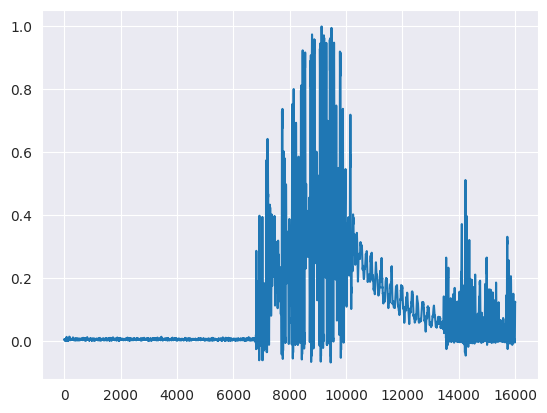

In [62]:
plt.plot(selected)